<h2 style='color:blue' align='center'>Sports Celebrity Image Classification: Data Cleaning<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread(r'E:\Projects\image classification\images dataset\Cristiano_Ronaldo\download (5).jpg')
img.shape

(225, 225, 3)

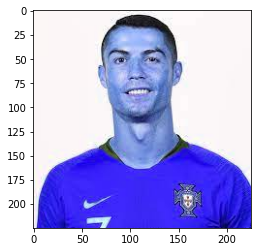

In [3]:
plt.imshow(img)

***converting to gray img***

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [5]:
gray

array([[247, 247, 247, ..., 248, 248, 248],
       [247, 247, 247, ..., 248, 248, 248],
       [247, 247, 247, ..., 248, 248, 248],
       ...,
       [246, 235, 243, ...,  98,  97,  56],
       [247, 232, 246, ..., 102, 100,  85],
       [240, 243, 246, ..., 113,  83,  58]], dtype=uint8)

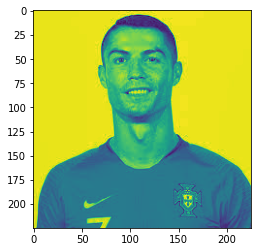

In [6]:
plt.imshow(gray)

In [7]:
#cv2.imshow("Image",img) this is not running

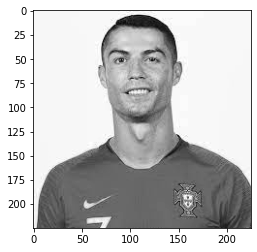

In [8]:
plt.imshow(gray, cmap='gray')

***face and eye detection***

In [9]:
face_cascade=cv2.CascadeClassifier(r'E:\Projects\image classification\opencv_haarcascades\haarcascade_frontalface_default.xml')

In [10]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[68, 20, 80, 80]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(68, 20, 80, 80)

In [12]:
face_img=img.copy()

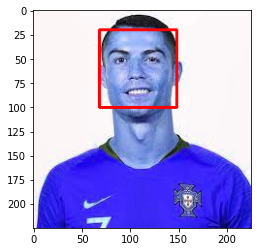

In [13]:
face_img = cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [14]:
for (x,y,w,h) in faces:
    face_img=img.copy()
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

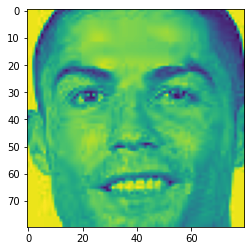

In [15]:
plt.imshow(roi_gray)

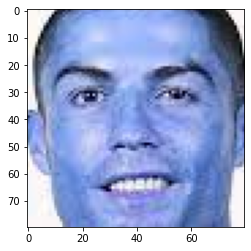

In [16]:
plt.imshow(roi_color)

In [17]:
eye_cascade =cv2.CascadeClassifier(r'E:\Projects\image classification\opencv_haarcascades\haarcascade_eye.xml')

***applied on whole image***

In [18]:
eyes=eye_cascade.detectMultiScale(gray)
eyes

array([[ 78,  40,  23,  23],
       [111,  41,  23,  23]], dtype=int32)

***eyes detection of whole picture***

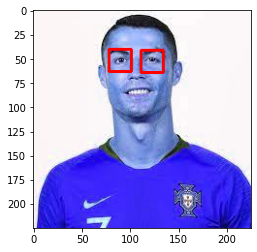

In [19]:
(x,y,w,h) = eyes[0]
(a,b,c,d) = eyes[1]
eye_img=img.copy()
eye_img = cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,0,0),2)
eye_img = cv2.rectangle(eye_img,(a,b),(a+c,b+d),(255,0,0),2)
plt.imshow(eye_img)

***applied on cropped image***

In [20]:
eyes_=eye_cascade.detectMultiScale(roi_gray, 1.1, 5)

In [21]:
eyes_

array([[10, 19, 24, 24],
       [44, 22, 22, 22]], dtype=int32)

***eyes detection of cropped picture***

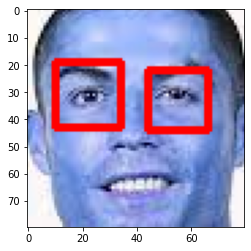

In [22]:
(x,y,w,h) = eyes_[0]
(a,b,c,d) = eyes_[1]
eye_img=roi_color.copy()
eye_img = cv2.rectangle(eye_img,(x,y),(x+w,y+h),(255,0,0),2)
eye_img2 = cv2.rectangle(eye_img,(a,b),(a+c,b+d),(255,0,0),2)
plt.imshow(eye_img2)

***face and eyes detection of whole picture simultanously***

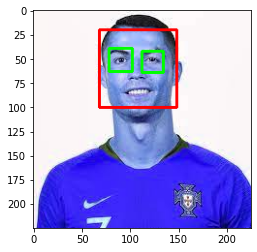

In [23]:
for (x,y,w,h) in faces:
    face_img=img.copy()
    face_img = cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

***making function for getting cropped image if face with 2 eyes are detected***

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

***passing an image to  get_cropped_image_if_2_eyes(image_path) function for getting cropped image if face with 2 eyes are detected***

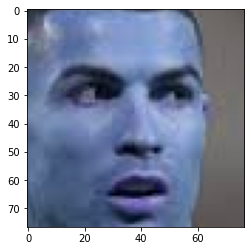

In [32]:
cropped_image = get_cropped_image_if_2_eyes(r'E:\Projects\image classification\images dataset\Cristiano_Ronaldo\images (12).jpg')
plt.imshow(cropped_image)

***passing another image to getcropped function***

In [33]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'E:\Projects\image classification\images dataset\Cristiano_Ronaldo\images (3).jpg')


***AS this image is not detected with face and two eyes so function return None***

In [34]:
cropped_image_no_2_eyes is not None

False

***paths of image dataset and cropped image dataset***

In [99]:
path_to_data = "E:\Projects\image classification\images dataset/"
path_to_cr_data ="E:\Projects\image classification\images dataset/cropped/"
path_to_cr_data 

'E:\\Projects\\image classification\\images dataset/cropped/'

### using os.scandir to explore directories

In [101]:
import os
for entry in os.scandir(path_to_data):
    #print(entry)
    print(entry.is_dir())
    #print(entry.path)
#dir(os.scandir(path_to_data))

True
True
True


***making list of directories under image dataset***

In [102]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [103]:
img_dirs

['E:\\Projects\\image classification\\images dataset/Cristiano_Ronaldo',
 'E:\\Projects\\image classification\\images dataset/Shaid_Afridi',
 'E:\\Projects\\image classification\\images dataset/virat_kohli']

***return false if path of cropped image dataset is not exists***

In [104]:
print(os.path.exists(path_to_cr_data))

False


***if path exists then it is deleted and making a new directory***

In [105]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

### getting celerberty name from directory

In [106]:
celebrity_name = img_dirs[0].split('/')[-1]
celebrity_name

'Cristiano_Ronaldo'

In [107]:
celebrity_file_names_dict = {}
celebrity_file_names_dict[celebrity_name] = []

In [108]:
celebrity_file_names_dict

{'Cristiano_Ronaldo': []}

In [109]:
i=0
detected_count=0
for entry in os.scandir(img_dirs[0]):
    roi_color= get_cropped_image_if_2_eyes(entry.path)
    i=i+1
    if roi_color is not None:
        detected_count=detected_count+1
        
        
    #plt.imshow(roi_color) # it generates TypeError: Image data of dtype object cannot be converted to float
print(i)
# as there are 58 images 
detected_count

26


11

In [110]:
i=0
detected_count=0
for entry in os.scandir(img_dirs[1]):
    roi_color= get_cropped_image_if_2_eyes(entry.path)
    i=i+1
    if roi_color is not None:
        detected_count=detected_count+1
        
        
    #plt.imshow(roi_color) # it generates TypeError: Image data of dtype object cannot be converted to float
print(i)
# as there are 58 images 
detected_count

50


18

In [89]:
# import numpy as np
# import matplotlib.pyplot as plt

# w = 10
# h = 10
# fig = plt.figure(figsize=(16, 16))
# columns = 3
# rows = 6
# i=0
# for direc in images_detected_dirs:
#     img=cv2.imread(direc)
#     i=i+1
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()

In [111]:
i=0
detected_count=0
for entry in os.scandir(img_dirs[2]):
    roi_color= get_cropped_image_if_2_eyes(entry.path)
    i=i+1
    if roi_color is not None:
        detected_count=detected_count+1
        
        
    #plt.imshow(roi_color) # it generates TypeError: Image data of dtype object cannot be converted to float
print(i)
# as there are 58 images 
detected_count

104


48

In [112]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Cristiano_Ronaldo
Generating cropped images in folder:  E:\Projects\image classification\images dataset/cropped/Cristiano_Ronaldo
Shaid_Afridi
Generating cropped images in folder:  E:\Projects\image classification\images dataset/cropped/Shaid_Afridi
virat_kohli
Generating cropped images in folder:  E:\Projects\image classification\images dataset/cropped/virat_kohli


### for handling error
OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-ttbyx0jz\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

In [41]:
# celebrity_name = img_dirs[3].split('/')[-1]
# print(celebrity_name)
# celebrity_file_names_dict[celebrity_name] = []
    
# for entry in os.scandir(img_dirs[3]):
#     roi_color = get_cropped_image_if_2_eyes(entry.path)
#     if roi_color is not None:
#         cropped_folder = path_to_cr_data + celebrity_name
#         if not os.path.exists(cropped_folder):
#             os.makedirs(cropped_folder)
#             cropped_image_dirs.append(cropped_folder)
#             print("Generating cropped images in folder: ",cropped_folder)
                
#         cropped_file_name = celebrity_name + str(count) + ".png"
#         cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
#         cv2.imwrite(cropped_file_path, roi_color)
#         celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
#         count += 1   

serena_williams


In [42]:
#celebrity_file_names_dict['virat_kohli']

In [43]:
# paths=[]
# for entry in os.scandir(img_dirs[3]):
#     paths.append(entry.path)

In [50]:
# len(paths)

In [51]:
# i=0
# for path in paths:
#     img = cv2.imread(path)
#     i=i+1
#     print(i)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [52]:
# paths[66]

In [47]:

# img = cv2.imread(paths[66])
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img)

In [48]:
#cropped_image_dirs 

In [49]:
#celebrity_file_names_dict 